In [1]:
from os import path
fname = path.expanduser(r'C:\Users\imran\OneDrive\Documents\GitHub\pythonLinkedIn\pythonWithLinkedIn\Python Scientific Stack\Exercise Files\Ch04\04_02\track.csv')


In [2]:
#File size in bytes
path.getsize(fname)

43844

In [3]:
#File size in kilobytes
path.getsize(fname)/ (1<<10)

42.81640625

In [4]:
with open(fname) as fp:
    for lnum, line in enumerate(fp):
        if lnum > 10:
            break
        print(line)

time,lat,lng,height

2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422

2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211

2015-08-20 03:48:25.660,35.014871,32.519612,123.0

2015-08-20 03:48:26.819,35.014824,32.519654,120.5

2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789

2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789

2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789

2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219

2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219

2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219



In [5]:
#To check how many entries (rows) of data, sum up all the lines ( 1 per line)
with open(fname) as fp:
    print(sum(1 for line in fp))

741


In [6]:
#Now load the data into pandas
import pandas as pd
#Traditionally call the loaded data df
df = pd.read_csv(fname)

In [7]:
#How many rows?
#740, 1 row less? it uses the first row as column names.
len(df)

740

In [8]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    740 non-null    object 
 1   lat     740 non-null    float64
 2   lng     740 non-null    float64
 3   height  740 non-null    float64
dtypes: float64(3), object(1)
memory usage: 23.2+ KB


In [10]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [11]:
#Pandas does a good job at guessing type, json files are better as it loads it all as string.
df.dtypes

time       object
lat       float64
lng       float64
height    float64
dtype: object

In [12]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# Source code:  https://github.com/pandas-dev/pandas/blob/v1.3.3/pandas/io/excel/_base.py#L1238-L1293

In [13]:
# We changed the time column from an object to a datetimes64[ns] format
df = pd.read_csv(fname, parse_dates=['time'])

In [14]:
df.dtypes

time      datetime64[ns]
lat              float64
lng              float64
height           float64
dtype: object

In [15]:
#access data via columns
df['lat']

0      35.015021
1      35.014954
2      35.014871
3      35.014824
4      35.014776
         ...    
735    35.014387
736    35.014355
737    35.014279
738    35.014264
739    35.014212
Name: lat, Length: 740, dtype: float64

In [16]:
#you can do dot lat too but sometimes column names have spaces and you can't use it.
df.lat.head()

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

In [17]:
#You can pick more than one column
df[['lat', 'lng']]

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
...,...,...
735,35.014387,32.517020
736,35.014355,32.517035
737,35.014279,32.517087
738,35.014264,32.517098


In [18]:
# A specific column and row
df['lat'][0]

35.015021000000004

In [19]:
# AN entire row using the loc
df.loc[0]

time      2015-08-20 03:48:07.235000
lat                           35.015
lng                          32.5196
height                         136.2
Name: 0, dtype: object

In [20]:
#Loc can work with slices as well
#loc slices return both the start and ending index
df.loc[2:7]

,time,lat,lng,height
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
5,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
6,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
7,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997


In [21]:
#Multiply  columns and rows
df[['lat', 'lng']][2:7]
# Row 7 isn't included now

,lat,lng
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
5,35.014704,32.519691
6,35.014657,32.519734


In [22]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [23]:
import numpy as np
df1 = pd.DataFrame(np.arange(10).reshape((5,2)), columns=['x', 'y'], index=['a', 'b', 'c', 'd', 'e'])
df1

,x,y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [24]:
# df1.loc[0] won't work as it works by label, our label is a not 0.
df1.loc['a']

x    0
y    1
Name: a, dtype: int32

In [25]:
df1.loc['b': 'd']

,x,y
b,2,3
c,4,5
d,6,7


In [26]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [27]:
#You can change the index to a time index (different column)
df.index = df['time']
df.index
#df.loc[0] will not work now.

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000',
               ...
               '2015-08-20 04:20:18.844000', '2015-08-20 04:20:21.996000',
               '2015-08-20 04:20:22.897000', '2015-08-20 04:20:24.905000',
               '2015-08-20 04:20:25.835000', '2015-08-20 04:20:28.982000',
               '2015-08-20 04:20:29.923000', '2015-08-20 04:20:32.863000',
               '2015-08-20 04:20:33.994000', '2015-08-20 04:20:42.329000'],
              dtype='datetime64[ns]', name='time', length=740, freq=None)

In [28]:
df.loc['2015-08-20 03:48']
#You will get all the entries with that time index

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
2015-08-20 03:48:29.720,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
2015-08-20 03:48:30.669,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
2015-08-20 03:48:33.793,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997
2015-08-20 03:48:34.869,2015-08-20 03:48:34.869,35.014549,32.519694,121.199997


In [29]:
import pytz

In [30]:
ts= df.index[0]

In [31]:
ts.tz_localize(pytz.UTC)

Timestamp('2015-08-20 03:48:07.235000+0000', tz='UTC')

In [32]:
ts.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Greenwich'))

Timestamp('2015-08-20 03:48:07.235000+0000', tz='Greenwich')

In [33]:
df.index.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Greenwich'))
df.index[:10]

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000'],
              dtype='datetime64[ns]', name='time', freq=None)

In [34]:
#Had to put the file into the same directory or do import sys then sys.path to see list of directories.
import geo

In [35]:
#Look at geo code
?? geo

In [36]:
from geo import circle_dist

In [37]:
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng

In [38]:
circle_dist(lat1, lng1, lat2, lng2)

0.007693931535344109

In [39]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [40]:
s.shift()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [41]:
s.shift(-1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [42]:
dist = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift() )

In [43]:
dist[:10]

time
2015-08-20 03:48:07.235         NaN
2015-08-20 03:48:24.734    0.007694
2015-08-20 03:48:25.660    0.009248
2015-08-20 03:48:26.819    0.006479
2015-08-20 03:48:27.828    0.006219
2015-08-20 03:48:29.720    0.008010
2015-08-20 03:48:30.669    0.006533
2015-08-20 03:48:33.793    0.010545
2015-08-20 03:48:34.869    0.002759
2015-08-20 03:48:37.708    0.007336
dtype: float64

In [44]:
# How long he jogs for, 4.6km or 2.9 miles
dist.sum()

4.688135968432568

In [45]:
dt = df['time']- df['time'].shift()

In [46]:
dt[:10]

time
2015-08-20 03:48:07.235                      NaT
2015-08-20 03:48:24.734   0 days 00:00:17.499000
2015-08-20 03:48:25.660   0 days 00:00:00.926000
2015-08-20 03:48:26.819   0 days 00:00:01.159000
2015-08-20 03:48:27.828   0 days 00:00:01.009000
2015-08-20 03:48:29.720   0 days 00:00:01.892000
2015-08-20 03:48:30.669   0 days 00:00:00.949000
2015-08-20 03:48:33.793   0 days 00:00:03.124000
2015-08-20 03:48:34.869   0 days 00:00:01.076000
2015-08-20 03:48:37.708   0 days 00:00:02.839000
Name: time, dtype: timedelta64[ns]

In [47]:
#32 mins of jogging
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [48]:
#TypeError: Cannot divide float64 data by TimedeltaArray

#dist/dt

In [49]:
#Divide by 3600 to get 1 hour eq.
#Check everything first in simple cases ( good habit)
dt[1].total_seconds()/3600


0.004860833333333333

In [50]:
dt[1] / np.timedelta64(1, 'h')

0.004860833333333333

In [51]:
speed = dist / (dt/  np.timedelta64(1, 'h'))

In [52]:
speed[:10]

time
2015-08-20 03:48:07.235          NaN
2015-08-20 03:48:24.734     1.582842
2015-08-20 03:48:25.660    35.954340
2015-08-20 03:48:26.819    20.123165
2015-08-20 03:48:27.828    22.187213
2015-08-20 03:48:29.720    15.241680
2015-08-20 03:48:30.669    24.783839
2015-08-20 03:48:33.793    12.151207
2015-08-20 03:48:34.869     9.230505
2015-08-20 03:48:37.708     9.302060
dtype: float64

In [53]:
df['dist'] = dist
df['dt'] = dt

In [54]:
df.head()

,time,lat,lng,height,dist,dt
time,,,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997,NaN,NaT
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998,0.007694,0 days 00:00:17.499000
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000,0.009248,0 days 00:00:00.926000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000,0.006479,0 days 00:00:01.159000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002,0.006219,0 days 00:00:01.009000


In [55]:
df1m = df.resample('1min').sum()

In [56]:
#Frequency=T, capital T means mins.
#This is  called offset Aliases
df1m.index

DatetimeIndex(['2015-08-20 03:48:00', '2015-08-20 03:49:00',
               '2015-08-20 03:50:00', '2015-08-20 03:51:00',
               '2015-08-20 03:52:00', '2015-08-20 03:53:00',
               '2015-08-20 03:54:00', '2015-08-20 03:55:00',
               '2015-08-20 03:56:00', '2015-08-20 03:57:00',
               '2015-08-20 03:58:00', '2015-08-20 03:59:00',
               '2015-08-20 04:00:00', '2015-08-20 04:01:00',
               '2015-08-20 04:02:00', '2015-08-20 04:03:00',
               '2015-08-20 04:04:00', '2015-08-20 04:05:00',
               '2015-08-20 04:06:00', '2015-08-20 04:07:00',
               '2015-08-20 04:08:00', '2015-08-20 04:09:00',
               '2015-08-20 04:10:00', '2015-08-20 04:11:00',
               '2015-08-20 04:12:00', '2015-08-20 04:13:00',
               '2015-08-20 04:14:00', '2015-08-20 04:15:00',
               '2015-08-20 04:16:00', '2015-08-20 04:17:00',
               '2015-08-20 04:18:00', '2015-08-20 04:19:00',
               '2015-08-

In [57]:
#speed = df1m['dist'] /(df1m['dt']/ np.timedelta64(1, 'h'))
#KeyError: 'dt'
#Sum only works on scalars

In [58]:
#Changing dt to a number instead of a time object
df['dt'] = dt/ np.timedelta64(1, 'h')
df1m = df.resample('1min').sum()
speed1m = df1m['dist'] / df1m['dt']

In [59]:
speed1m[:10]

time
2015-08-20 03:48:00     8.127118
2015-08-20 03:49:00     7.579874
2015-08-20 03:50:00     9.127972
2015-08-20 03:51:00    10.220818
2015-08-20 03:52:00    10.114279
2015-08-20 03:53:00     9.687690
2015-08-20 03:54:00    10.856446
2015-08-20 03:55:00    10.892145
2015-08-20 03:56:00    10.270580
2015-08-20 03:57:00     6.629397
Freq: T, dtype: float64

In [60]:
speed1m.describe()

count    33.000000
mean      8.658214
std       1.543214
min       5.285595
25%       7.543402
50%       8.538120
75%      10.220818
max      10.892145
dtype: float64

In [61]:
# Line magic function % telling matplotlib to display the plots in our file
%matplotlib inline

<AxesSubplot:xlabel='time'>

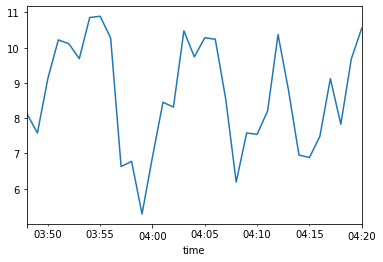

In [62]:
speed1m.plot()

In [63]:
import matplotlib.pyplot as plt

In [64]:
plt.rcParams['figure.figsize'] = (10, 6)

In [65]:
plt.style.use('seaborn-whitegrid')

<AxesSubplot:xlabel='time'>

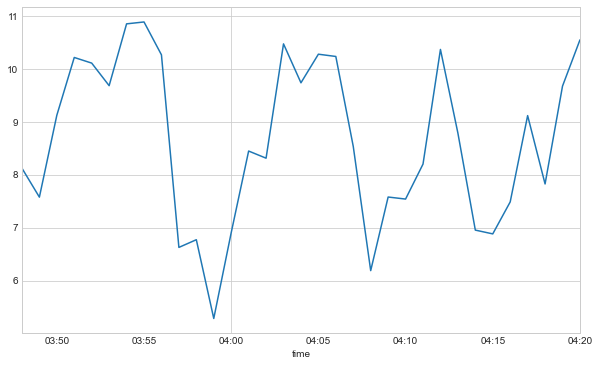

In [66]:
speed1m.plot()

<AxesSubplot:>

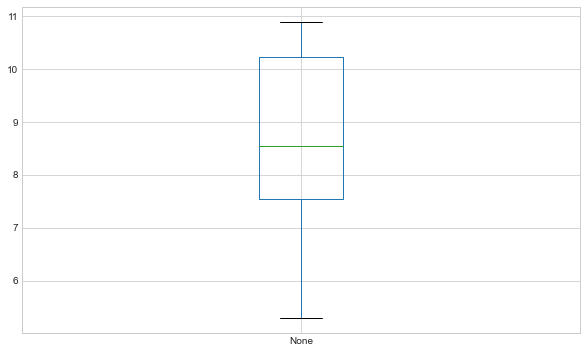

In [67]:
speed1m.plot.box()

In [68]:
#import folium
#ModuleNotFoundError: No module named 'folium'


In [69]:
import folium

In [90]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=50)

#Optional: resampling the data points to take the average of each minute to reduce the markers on the map
mdf = df.resample('T').mean()
def add_marker(row):
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'))
    marker.add_to(m)
    
    
#Run the function on each row, instead of column 'axis=1'  
mdf.apply(add_marker, axis=1)
m

AttributeError: 'DataFrame' object has no attribute 'name'